# Phase 1: Data Understanding and Preparation

In this section, we will:

- Load the Uber Fares dataset into a Pandas DataFrame
- Explore the dataset structure, dimensions, and data types
- Review variable descriptions
- Perform an initial data quality assessment

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Load the Uber Fares dataset
df = pd.read_csv('uber.csv')

# Display the first 5 rows
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Dataset Structure and Variable Descriptions

- **key**: Unique identifier for each trip
- **fare_amount**: Fare paid by the customer (USD)
- **pickup_datetime**: Date and time of pickup
- **pickup_longitude**: Longitude coordinate of pickup location
- **pickup_latitude**: Latitude coordinate of pickup location
- **dropoff_longitude**: Longitude coordinate of dropoff location
- **dropoff_latitude**: Latitude coordinate of dropoff location
- **passenger_count**: Number of passengers

In [2]:
# Explore dataset structure and data types
print('Shape of dataset:', df.shape)
df.info()

Shape of dataset: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
# Initial data quality assessment
# Check for missing values and basic statistics
df.isnull().sum(), df.describe(include='all')

(Unnamed: 0           0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    1
 dropoff_latitude     1
 passenger_count      0
 dtype: int64,
           Unnamed: 0                          key    fare_amount  \
 count   2.000000e+05                       200000  200000.000000   
 unique           NaN                       200000            NaN   
 top              NaN  2015-05-07 19:52:06.0000003            NaN   
 freq             NaN                            1            NaN   
 mean    2.771250e+07                          NaN      11.359955   
 std     1.601382e+07                          NaN       9.901776   
 min     1.000000e+00                          NaN     -52.000000   
 25%     1.382535e+07                          NaN       6.000000   
 50%     2.774550e+07                          NaN       8.500000   
 75%     4.155530e+07                          NaN      12.500000   
 max     5

## Data Cleaning and Export

We will now handle missing values, clean the data, and export the cleaned dataset for Power BI import.

In [4]:
# Data Cleaning Steps
# 1. Remove rows with missing or zero coordinates
# 2. Remove rows with negative or zero fare amounts
# 3. Remove rows with invalid passenger counts

# Remove rows with missing values
df_clean = df.dropna()

# Remove rows with zero coordinates (likely invalid)
coord_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for col in coord_cols:
    df_clean = df_clean[df_clean[col] != 0.0]

# Remove rows with negative or zero fare amounts
df_clean = df_clean[df_clean['fare_amount'] > 0]

# Remove rows with invalid passenger counts (should be 1-6)
df_clean = df_clean[(df_clean['passenger_count'] >= 1) & (df_clean['passenger_count'] <= 6)]

# Show shape after cleaning
df_clean.shape

(195325, 9)

In [5]:
# Export the cleaned dataset for Power BI import
df_clean.to_csv('uber_cleaned.csv', index=False)
print('Cleaned dataset exported as uber_cleaned.csv')

Cleaned dataset exported as uber_cleaned.csv


# Phase 2: Exploratory Data Analysis (EDA)

In this section, we will:

- Generate descriptive statistics (mean, median, mode, std, quartiles, ranges, outlier detection)

- Visualize fare distribution patterns

- Analyze relationships between key variables (fare vs. distance, fare vs. time of day, and more)

In [6]:
# Descriptive statistics for fare_amount
print('Mean:', df_clean['fare_amount'].mean())
print('Median:', df_clean['fare_amount'].median())
print('Mode:', df_clean['fare_amount'].mode()[0])
print('Standard Deviation:', df_clean['fare_amount'].std())
print('Min:', df_clean['fare_amount'].min())
print('Max:', df_clean['fare_amount'].max())
print('Quartiles:')
print(df_clean['fare_amount'].quantile([0.25, 0.5, 0.75]))

Mean: 11.352337130423653
Median: 8.5
Mode: 6.5
Standard Deviation: 9.804450699805281
Min: 0.01
Max: 499.0
Quartiles:
0.25     6.0
0.50     8.5
0.75    12.5
Name: fare_amount, dtype: float64


In [7]:
# Outlier identification using IQR
Q1 = df_clean['fare_amount'].quantile(0.25)
Q3 = df_clean['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_clean[(df_clean['fare_amount'] < lower_bound) | (df_clean['fare_amount'] > upper_bound)]
print(f'Number of outliers in fare_amount: {outliers.shape[0]}')

Number of outliers in fare_amount: 16741


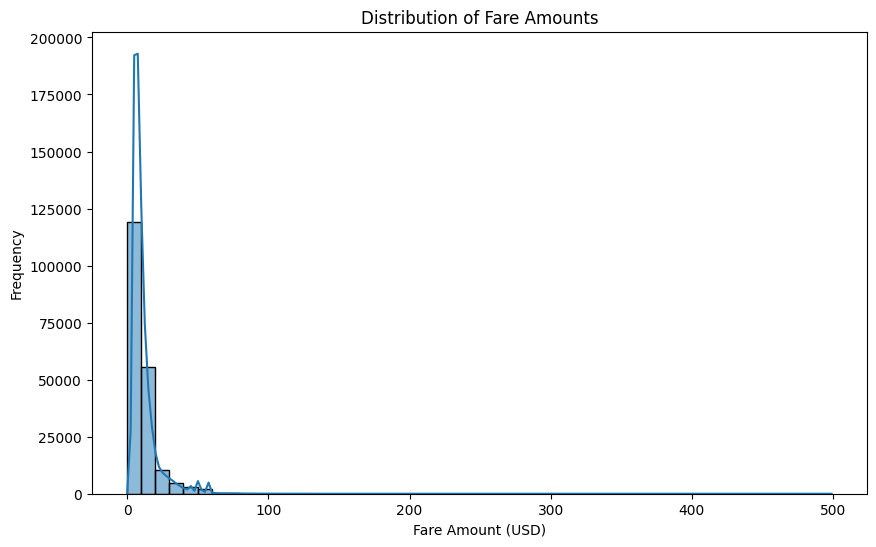

In [8]:
# Visualize fare distribution patterns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_clean['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Frequency')
plt.show()

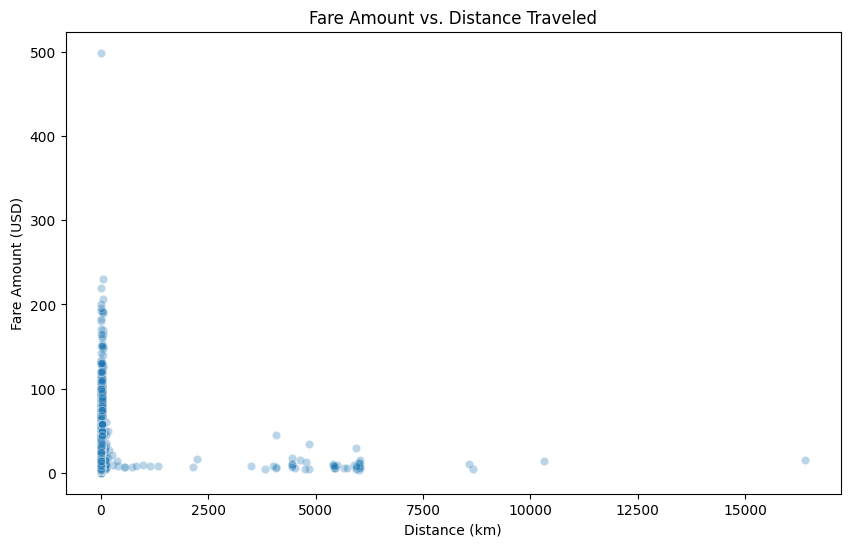

In [9]:
# Calculate distance traveled using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    from math import radians, sin, cos, sqrt, atan2
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

df_clean['distance_km'] = df_clean.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Scatter plot: Fare amount vs. Distance
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance_km', y='fare_amount', data=df_clean, alpha=0.3)
plt.title('Fare Amount vs. Distance Traveled')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount (USD)')
plt.show()

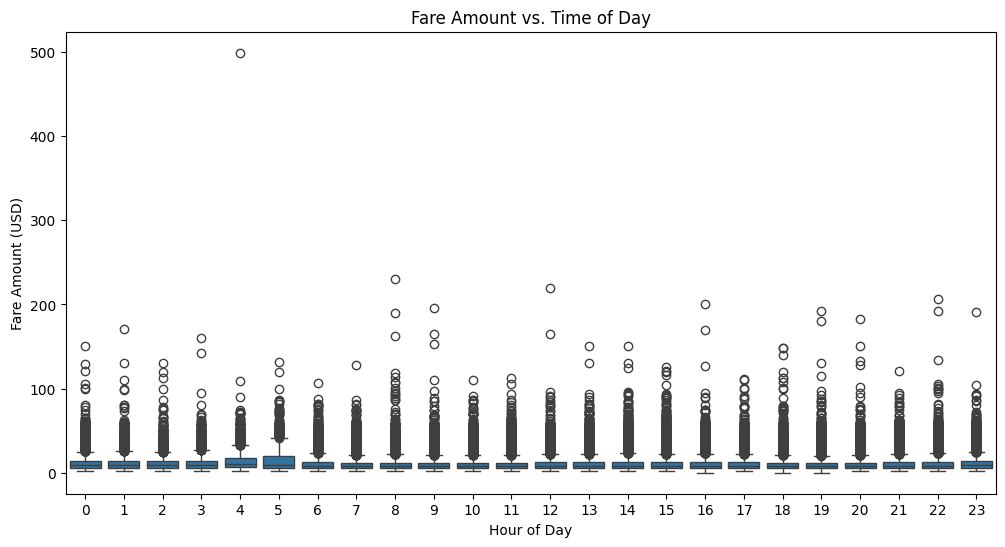

In [10]:
# Convert pickup_datetime to datetime and extract hour
if not np.issubdtype(df_clean['pickup_datetime'].dtype, np.datetime64):
    df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour

# Boxplot: Fare amount vs. Time of day
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y='fare_amount', data=df_clean)
plt.title('Fare Amount vs. Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount (USD)')
plt.show()

Correlation matrix:
                 fare_amount  distance_km  passenger_count      hour
fare_amount         1.000000     0.031141         0.010588 -0.020883
distance_km         0.031141     1.000000         0.004496 -0.003065
passenger_count     0.010588     0.004496         1.000000  0.014699
hour               -0.020883    -0.003065         0.014699  1.000000


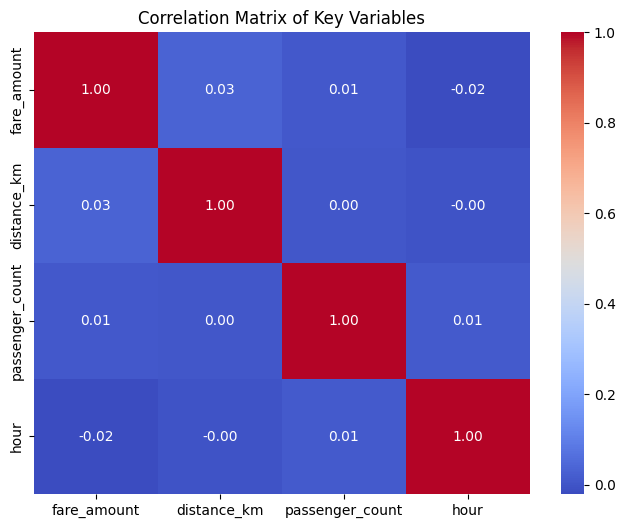

In [11]:
# Additional correlation analysis
corr = df_clean[['fare_amount', 'distance_km', 'passenger_count', 'hour']].corr()
print('Correlation matrix:')
print(corr)

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Phase 3: Feature Engineering

In this section, we will:

- Extract hour, day, month, and day of week from timestamps

- Create peak/off-peak time indicators

- Encode categorical variables if needed

- Save the enhanced dataset for Power BI import

In [12]:
# Feature Engineering: Extract new time-based features
# Ensure pickup_datetime is datetime
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

def get_peak(row):
    # Define peak hours as 7-9am and 4-7pm weekdays
    if row['day_of_week'] < 5 and ((7 <= row['hour'] <= 9) or (16 <= row['hour'] <= 19)):
        return 'Peak'
    else:
        return 'Off-Peak'
df_clean['peak_offpeak'] = df_clean.apply(get_peak, axis=1)

# Convert peak_offpeak to categorical
df_clean['peak_offpeak'] = df_clean['peak_offpeak'].astype('category')

# Show sample of new features
df_clean[['pickup_datetime','hour','day','month','day_of_week','peak_offpeak']].head()

,pickup_datetime,hour,day,month,day_of_week,peak_offpeak
0,2015-05-07 19:52:06+00:00,19,7,5,3,Peak
1,2009-07-17 20:04:56+00:00,20,17,7,4,Off-Peak
2,2009-08-24 21:45:00+00:00,21,24,8,0,Off-Peak
3,2009-06-26 08:22:21+00:00,8,26,6,4,Peak
4,2014-08-28 17:47:00+00:00,17,28,8,3,Peak


In [13]:
# Save the enhanced dataset for Power BI import
df_clean.to_csv('uber_enhanced.csv', index=False)
print('Enhanced dataset exported as uber_enhanced.csv')

Enhanced dataset exported as uber_enhanced.csv
